# Rossmann Store Sales Prediction

## The mission statement
<b><i>Rossmann operates over 4,000 drugstores across 10 European countries. Currently, store managers at Rossmann are responsible for predicting their daily sales up to six weeks in advance. Store sales are influenced by numerous factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers making predictions based on their unique circumstances, the accuracy of these forecasts can vary significantly. We have been provided with historical sales data for 1,115 Rossmann stores. 
    The main objective of this project is to develop an optimal model to help the company accurately forecast sales.</i></b>

<img src="https://www.gesundbrunnen-center.de/fileadmin/user_upload/GLOBAL/brand_stores/logos/rossmann.jpg" width=400>

# Findings
* Closer competiton distance make stores more competitive and thus using Promo codes can help them to boost sales 
* Store Type affects the sales
* Promo code can help increase in the competition and lead to more sales
* Since most of the stores are closed on Holidays, the feature has no effect on sales

### Table of content
1. Exploratory Data Analysis
2. Impution
3. Outliers detection and removal
4. Further Exploratory Data Analysis
5. Label encoding and One hot Encoding
6. Model building and evaluation
7. Feature importance Analysis

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

sns.set_palette(palette='viridis')

## 1. Exploratory Data Analysis

In [99]:
store_df = pd.read_csv('store.csv')
store_df.head(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [100]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### Train Data

In [101]:
train_df = pd.read_csv('train.csv')
train_df.columns

C:\Users\bwilc\AppData\Local\Temp\ipykernel_54548\4102256243.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [102]:
df = pd.merge(train_df, store_df, on='Store')
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [103]:
df.shape

(1017209, 18)

In [104]:
print("Total size of data: ", len(df))
print(df.isnull().sum())

Total size of data:  1017209
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


In [105]:
columns = list(df)
columns.remove('Date')
columns.remove('CompetitionDistance')

In [106]:
for col in columns:
    print(col,"---->", df[col].unique())

Store ----> [   1    2    3 ... 1113 1114 1115]
DayOfWeek ----> [5 4 3 2 1 7 6]
Sales ----> [ 5263  5020  4782 ... 20362 18841 21237]
Customers ----> [ 555  546  523 ... 3727 4022 4106]
Open ----> [1 0]
Promo ----> [1 0]
StateHoliday ----> ['0' 'a' 'b' 'c' 0]
SchoolHoliday ----> [1 0]
StoreType ----> ['c' 'a' 'd' 'b']
Assortment ----> ['a' 'c' 'b']
CompetitionOpenSinceMonth ----> [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
CompetitionOpenSinceYear ----> [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Promo2 ----> [0 1]
Promo2SinceWeek ----> [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Promo2SinceYear ----> [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
PromoInterval ----> [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [107]:
# extracting year and month from Date 
df['Year'] = df['Date'].apply(lambda x: int(str(x)[:4]))
df['Month'] = df['Date'].apply(lambda x: int(str(x)[:4]))

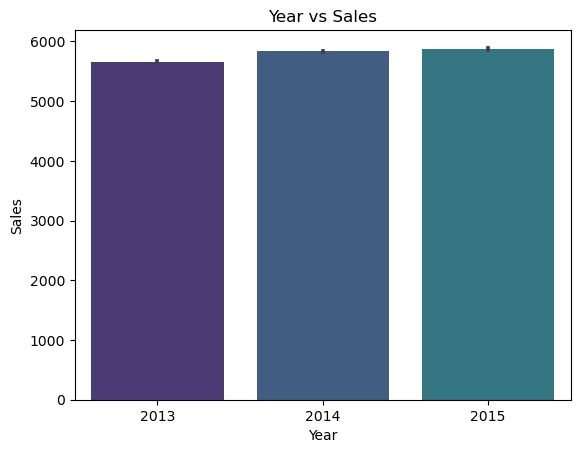

In [108]:
sns.barplot(x="Year", y="Sales", data=df).set(title="Year vs Sales")
plt.show()

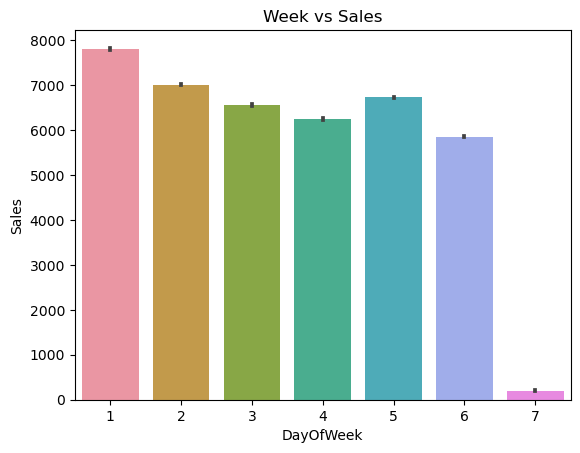

In [109]:
# Sales with respect to week
sns.barplot(x='DayOfWeek', y='Sales', data=df).set(title='Week vs Sales')
plt.show()

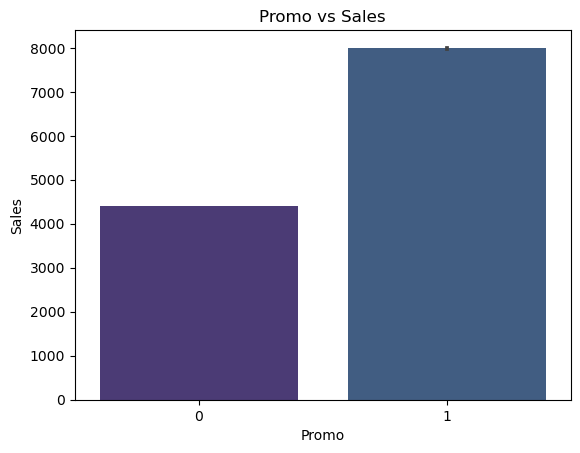

In [110]:
sns.barplot(x='Promo', y='Sales', data=df).set(title="Promo vs Sales")
plt.show()

Customers are definately attracted by Promo codes thus sales are higher when there is a Promo code in a Store

In [111]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"
df["StateHoliday"].loc[df["StateHoliday"] == 0] = "0"

C:\Users\bwilc\AppData\Local\Temp\ipykernel_54548\1489047761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["StateHoliday"].loc[df["StateHoliday"] == 0] = "0"


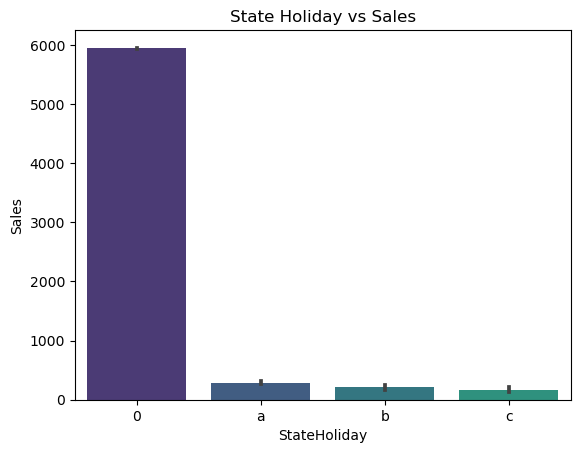

In [112]:
sns.barplot(x='StateHoliday', y='Sales', data=df).set(title='State Holiday vs Sales')
plt.show()

Most stores are closed on State Holidays that's why we can see that there are very less sales in a,b,c where:
* a = Public Holiday
* b = Easter Holiday
* c = Chirstmas 
* 0 = No Holiday, Working day

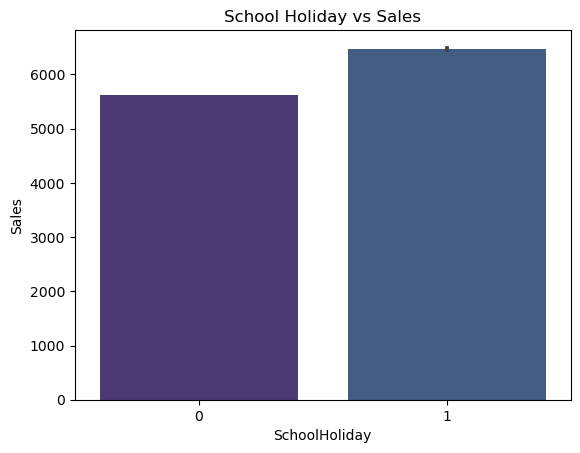

In [113]:
sns.barplot(x='SchoolHoliday', y='Sales', data=df).set(title="School Holiday vs Sales")
plt.show()

On School Holidays there are more sales!

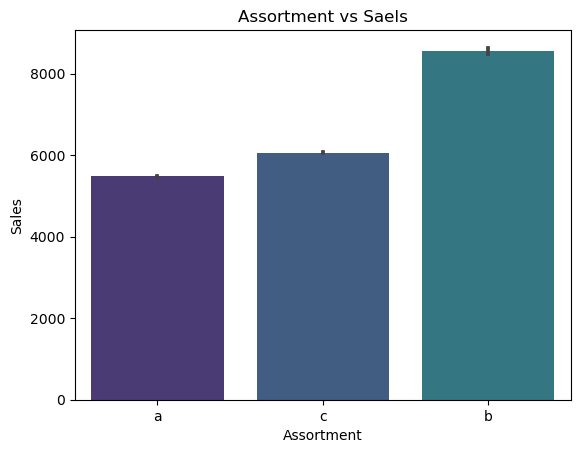

In [114]:
# Sales with respect to StoreType
sns.barplot(x="Assortment", y='Sales', data=df).set(title="Assortment vs Saels")
plt.show()

a,b,c,d are store models where b type stores have the highest sales 

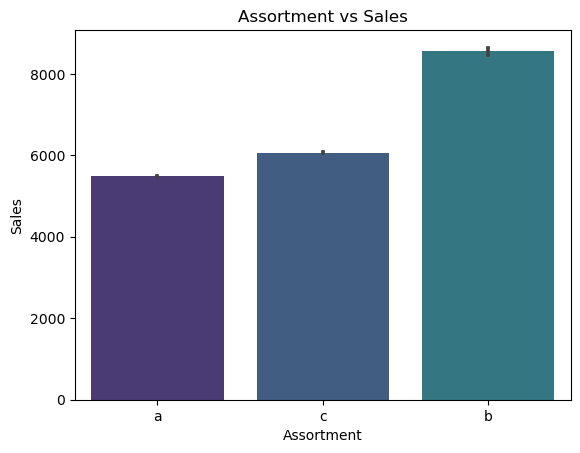

In [115]:
# Sales with respect to Assortment
sns.barplot(x='Assortment', y='Sales', data=df).set(title="Assortment vs Sales")
plt.show()

* a = basic
* b = extra
* c = entended

## 3. Outliers detection and removal

### Filling missing values and removing outliers

Few columns have high number of missing values, so we need to fill them with appropriate method for better result

Approach

1: The null values in Column Promo2SinceWeek, Promo2SinceYear, PromoInterval is due to Promo2 is 0 for those stores. So we would fill all the null values in these columns with 0.

2: Since Competition Distance for 3 stores isn't given so we could fill it with mean of the distance given for all other stores

3: CompetitionOpenSinceMonth, CompetitionOpenSinceYear can be filled using the most occuring month and year respectively. 

In [116]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [117]:
train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [118]:
# Filling Promo2SinceWeek, Promo2SinceYear, PromoInterval with 0
store_df.update(store_df[['Promo2SinceWeek','Promo2SinceYear','PromoInterval']].fillna(0))

In [119]:
# Filling CompetitionDistance with mean distance
mean_competition_dist = store_df['CompetitionDistance'].mean()
store_df["CompetitionDistance"].fillna(mean_competition_dist, inplace=True)

In [120]:
# Filling CompetitionOpenSinceMonth, CompetitionOpenSinceYear with most occuring month and year respectively
mode_competition_opne_month = store_df['CompetitionOpenSinceMonth'].mode()[0]

mode_competition_open_year = store_df['CompetitionOpenSinceYear'].mode()[0]

store_df['CompetitionOpenSinceMonth'].fillna(mode_competition_opne_month, inplace=True)
store_df['CompetitionOpenSinceYear'].fillna(mode_competition_open_year, inplace=True)


In [121]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [122]:
# merging the data again
combined_df = pd.merge(train_df, store_df, on='Store')
combined_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [123]:
combined_df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

<Axes: title={'center': 'Sales vs CompetitionDistance'}, xlabel='CompetitionDistance', ylabel='Sales'>

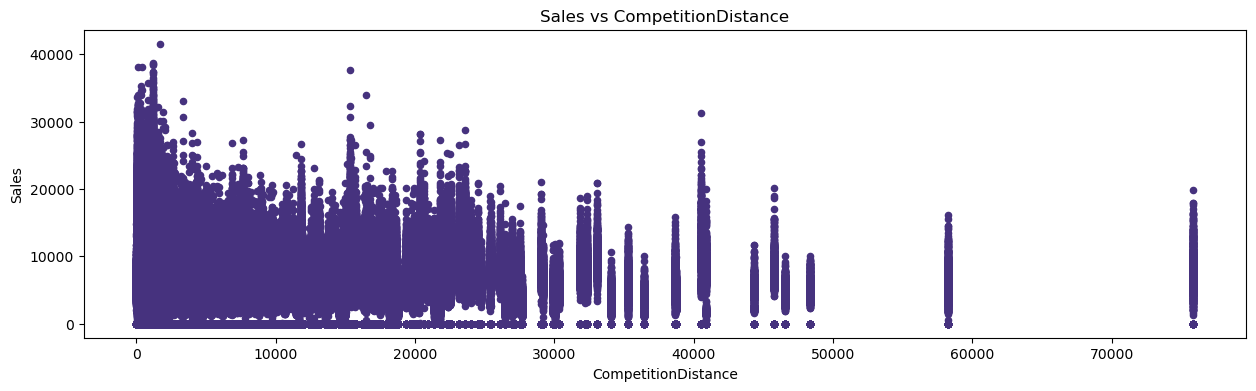

In [124]:
combined_df.plot(kind='scatter', x='CompetitionDistance', y='Sales', figsize=(15,4),title="Sales vs CompetitionDistance")

CompetitionDistance is the distance in meters to the nearest competitor store, the more nearer the two stores are the more sales can be seen

### Finding outliers

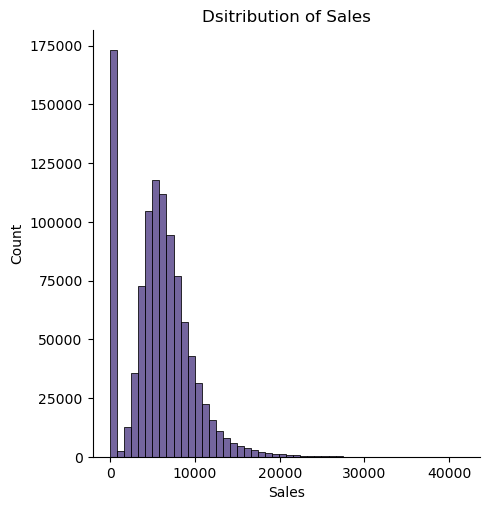

In [125]:
sns.displot(combined_df, x="Sales",bins=50).set(title='Dsitribution of Sales')

As we can see in the distribution plot Sales greater than 30k are very less so they might be the outliers

### Z-Score: If the Z-score of datapoint is greater than 3 that can be considered as an Outlier

Mean of Sales:  5773.818972305593
Standard Deviation of Sales:  3849.9242828437527
Total outliers in dataset are:  9731
Max Sales Outlier:  41551
Min Sales Outlier:  17325


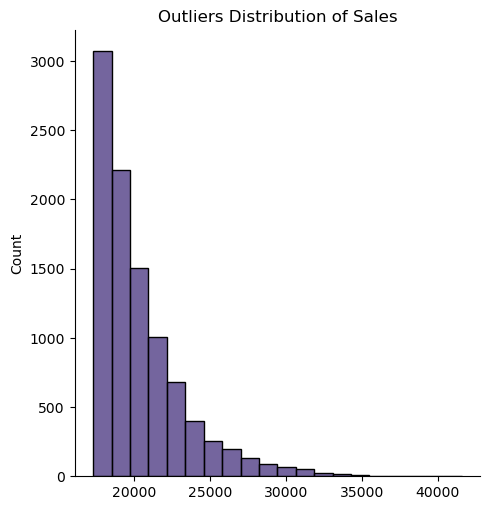

In [126]:
mean_sales = np.mean(combined_df["Sales"])
std_sales = np.std(combined_df["Sales"])
print("Mean of Sales: ", mean_sales)
print("Standard Deviation of Sales: ", std_sales)

threshold = 3
outlier = []

for i in combined_df['Sales']:
    z=(i-mean_sales)/std_sales
    if z>threshold:
        outlier.append(i)
print("Total outliers in dataset are: ", len(outlier))
print("Max Sales Outlier: ", max(outlier))
print("Min Sales Outlier: ", min(outlier))

sns.displot(x=outlier, bins=20).set(title="Outliers Distribution of Sales")



In [127]:
# Looking for outliers
sales_zero = combined_df.loc[combined_df['Sales'] == 0]
sales_greater_than_30k = combined_df.loc[combined_df['Sales'] > 30000]

print("Length of actual dataset: ", len(combined_df))
print("Length of data where sales is 0: ", len(sales_zero), 
     "which is ", round(len(sales_zero)/len(combined_df)*100, 2), "% of the whole data")

print("Length of data which is greater than 30k ", len(sales_greater_than_30k),
     "which is ", round(len(sales_greater_than_30k)/len(combined_df)*100, 2), "% of the whole data")

Length of actual dataset:  1017209
Length of data where sales is 0:  172871 which is  16.99 % of the whole data
Length of data which is greater than 30k  153 which is  0.02 % of the whole data


Droping sales which are greater than 30k as they are very less in the dataset and are probably outliers

In [128]:
combined_df.drop(combined_df.loc[combined_df['Sales'] >30000].index, inplace=True)
combined_df.shape

(1017056, 18)

## 4. Further EDA - exploring exceptional cases

Looking for a scenerio where the Stores are open and yet there is no sales on that day

In [129]:
# no sales when Stores were Open
no_holiday_zero_sales = combined_df.loc[(combined_df['Sales'] ==0) & (combined_df['Open']==1) & 
                                       (combined_df['StateHoliday'] == 0) & (combined_df['SchoolHoliday'] == 0)]

print("Size of the data where sales were zero even when stores were opne: ", 
     len(no_holiday_zero_sales))



Size of the data where sales were zero even when stores were opne:  12


In [130]:
no_holiday_zero_sales.head(12)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
22589,25,4,2014-02-13,0,0,1,0,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,0
22590,25,3,2014-02-12,0,0,1,0,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,0
25212,28,4,2014-09-04,0,0,1,1,0,0,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec"
205303,227,4,2014-09-11,0,0,1,0,0,0,a,a,2370.0,9.0,2013.0,0,0.0,0.0,0
297110,327,3,2014-03-12,0,0,1,0,0,0,c,c,1390.0,12.0,2004.0,0,0.0,0.0,0
324624,357,1,2014-09-22,0,0,1,0,0,0,a,a,2060.0,10.0,2008.0,0,0.0,0.0,0
567892,623,6,2014-01-25,0,0,1,0,0,0,a,a,4080.0,3.0,2011.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
567893,623,5,2014-01-24,0,0,1,1,0,0,a,a,4080.0,3.0,2011.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
760375,835,4,2014-09-11,0,0,1,0,0,0,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
760376,835,3,2014-09-10,0,0,1,0,0,0,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"


In [131]:
combined_df.drop(combined_df.loc[(combined_df['Sales']==0) & (combined_df['Open']==1) &
                                (combined_df['StateHoliday'] == 0) &
                                 (combined_df['SchoolHoliday']==0)].index, inplace=True)

combined_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


###  Converting Categorical Variable to Numeric

In [132]:
combined_df['Year'] = combined_df['Date'].apply(lambda x: int(str(x)[:4]))
combined_df['Month'] = combined_df['Date'].apply(lambda x: int(str(x)[5:7]))
combined_df.drop(['Date'], axis=1, inplace=True)

In [133]:
combined_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,4,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,3,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,2,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,1,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


In [134]:
# encoding all categorical varibale to numeric values
from sklearn import preprocessing

In [135]:
label_encoder = preprocessing.LabelEncoder()

combined_df['StoreType'] = label_encoder.fit_transform(combined_df['StoreType'])
combined_df['Assortment'] = label_encoder.fit_transform(combined_df['Assortment'])

# for promo interval
combined_df["PromoInterval"].loc[combined_df["PromoInterval"] == "Jan,Apr,Jul,Oct"] =1
combined_df["PromoInterval"].loc[combined_df["PromoInterval"] == "Feb,May,Aug,Nov"] =2
combined_df["PromoInterval"].loc[combined_df["PromoInterval"] == "Mar,Jun,Sept,Dec"] =3

# for State Holiday
combined_df["StateHoliday"].loc[combined_df["StateHoliday"] == 'a']=1
combined_df["StateHoliday"].loc[combined_df["StateHoliday"] == 'b']=2
combined_df["StateHoliday"].loc[combined_df["StateHoliday"] == 'c']=3

C:\Users\bwilc\AppData\Local\Temp\ipykernel_54548\2131323865.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df["PromoInterval"].loc[combined_df["PromoInterval"] == "Jan,Apr,Jul,Oct"] =1
C:\Users\bwilc\AppData\Local\Temp\ipykernel_54548\2131323865.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df["PromoInterval"].loc[combined_df["PromoInterval"] == "Feb,May,Aug,Nov"] =2
C:\Users\bwilc\AppData\Local\Temp\ipykernel_54548\2131323865.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [136]:
combined_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,4,5020,546,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,3,4782,523,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,2,5011,560,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,1,6102,612,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


In [137]:
combined_df['StateHoliday'] = pd.to_numeric(combined_df['StateHoliday'])
combined_df['PromoInterval'] = pd.to_numeric(combined_df['PromoInterval'])

<Axes: >

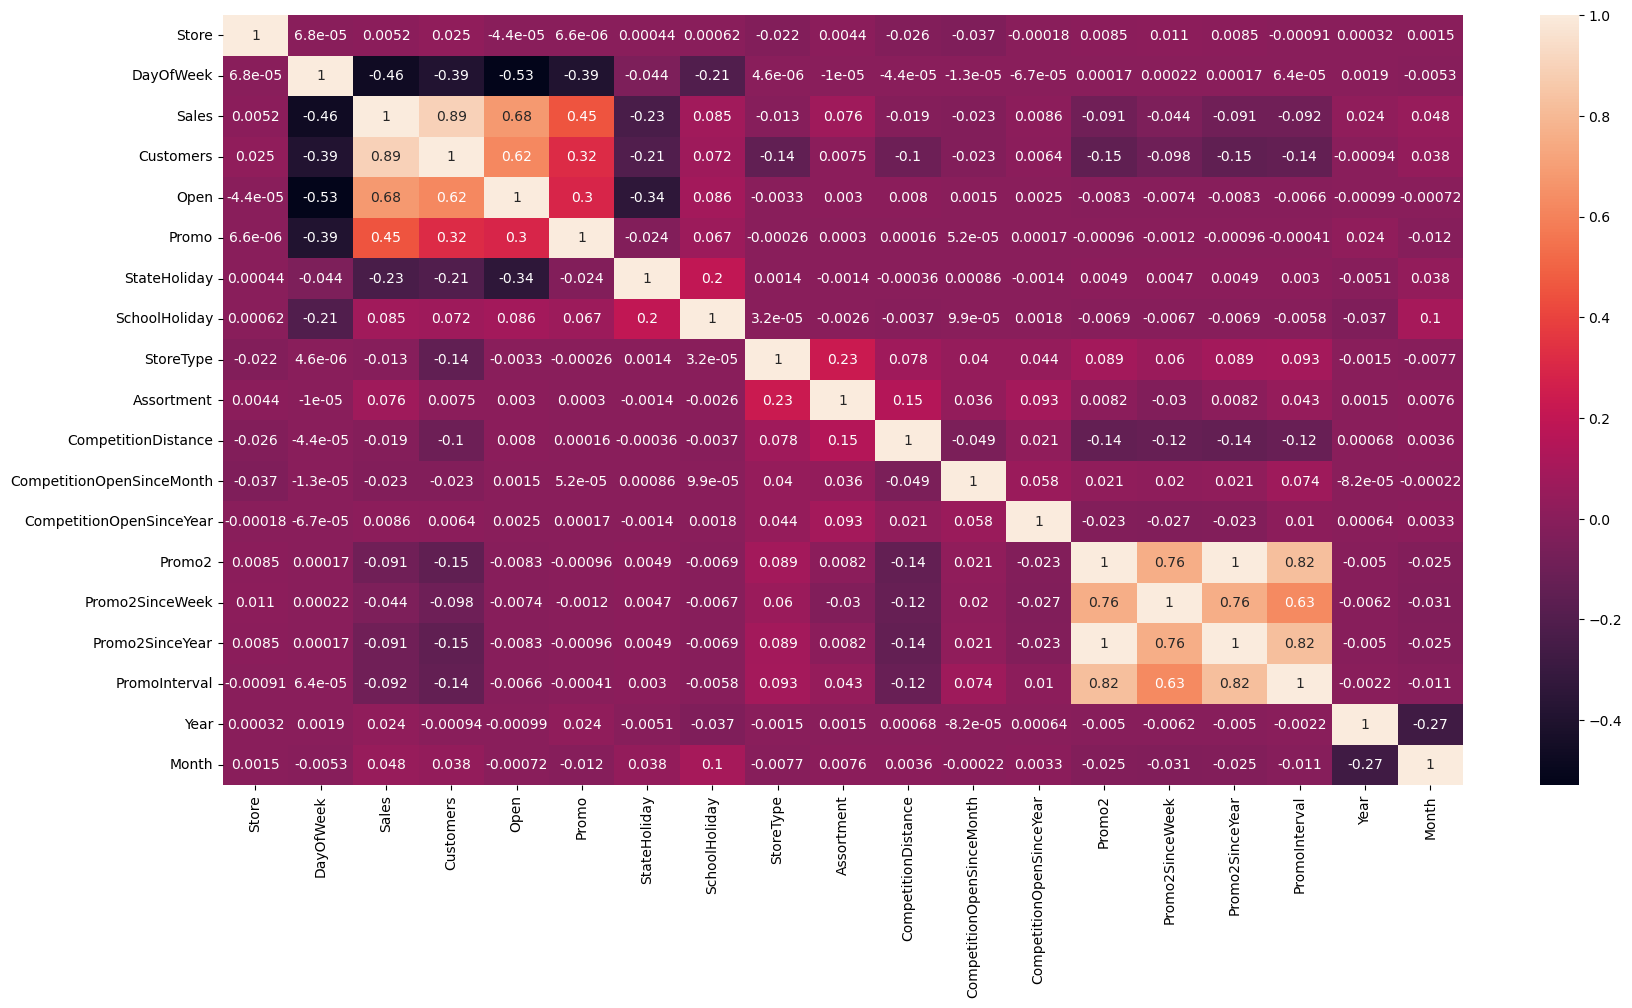

In [138]:
plt.figure(figsize=(20, 10))
sns.heatmap(combined_df.corr(), annot=True)

Correlation map shows
* Sales is highly correlated with Customers, Open, Promo code
* Promo code is highly correlated to Promo2SinceWeek, Promo2SinceYear, PromoInterval

## 5. Implementing Models

In [139]:
combined_df[combined_df['Open']==0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
5,1,7,0,0,0,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
12,1,7,0,0,0,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
19,1,7,0,0,0,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
26,1,7,0,0,0,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
33,1,7,0,0,0,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017182,1115,7,0,0,0,0,0,0,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,2013,1
1017189,1115,7,0,0,0,0,0,0,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,2013,1
1017196,1115,7,0,0,0,0,0,0,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,2013,1
1017203,1115,7,0,0,0,0,0,1,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,2013,1


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import math


In [141]:
combined_df_subset = combined_df[combined_df['Open'] == 1]
combined_df_subset_closed = combined_df[combined_df['Open'] == 0]

x_train, x_test, y_train, y_test_open = train_test_split(combined_df_subset.drop(['Sales', 'Customers', 'Open'], axis=1),
                                                        combined_df_subset['Sales'], test_size=0.20)

In [142]:
epsilon = 1e-10

In [143]:
x_train.columns

Index(['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month'],
      dtype='object')

### Linear regression

In [144]:
from sklearn import linear_model

In [145]:
reg_model = linear_model.LinearRegression()
reg_model.fit(x_train, y_train)

prediction_open = reg_model.predict(x_test)

prediction_closed = np.zeros(combined_df_subset_closed.shape[0])
prediction = np.append(prediction_open, prediction_closed)


y_test = np.append(y_test_open, np.zeros(combined_df_subset_closed.shape[0]))

print("R2 score :", r2_score(y_test, prediction))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, prediction))
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test,prediction)))

R2 score : 0.7736203641888677
Mean absolute error: 1002.06
Root mean squared error:  1951.2715369761079


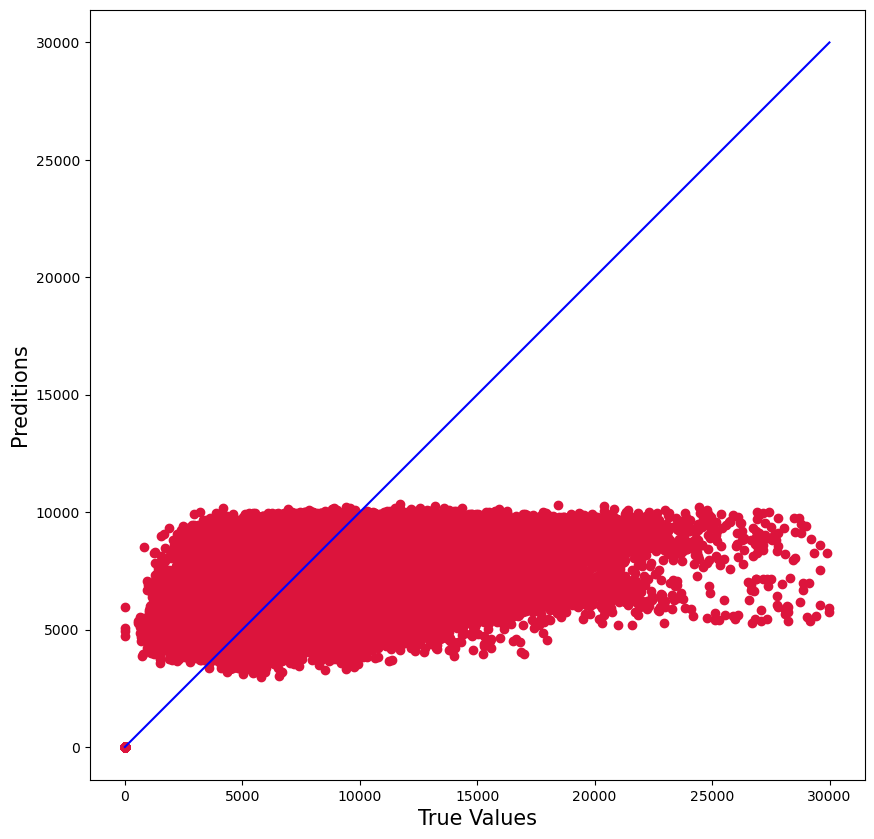

In [146]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Preditions', fontsize=15)
plt.axis('equal')
plt.show()

###  SGD Regressor
Stochastic Gradient Descent (SGD) is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of functions that minimize a cost function. 

In [147]:
from sklearn.linear_model import SGDRegressor
sgd_regressor_model = SGDRegressor(max_iter=2)  # increasing this value leads to over fitting
sgd_regressor_model.fit(x_train,y_train)

prediction_open = sgd_regressor_model.predict(x_test)
prediction_closed = np.zeros(combined_df_subset_closed.shape[0])

prediction = np.append(prediction_open, prediction_closed)

y_test = np.append(y_test_open, np.zeros(combined_df_subset_closed.shape[0]))

print("r2_score: ",r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,prediction))
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test,prediction)))


r2_score:  -1.599612273576321e+24
Mean absolute error: 3480426243786126.00
Root mean squared error:  5186882322009237.0


C:\Users\bwilc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


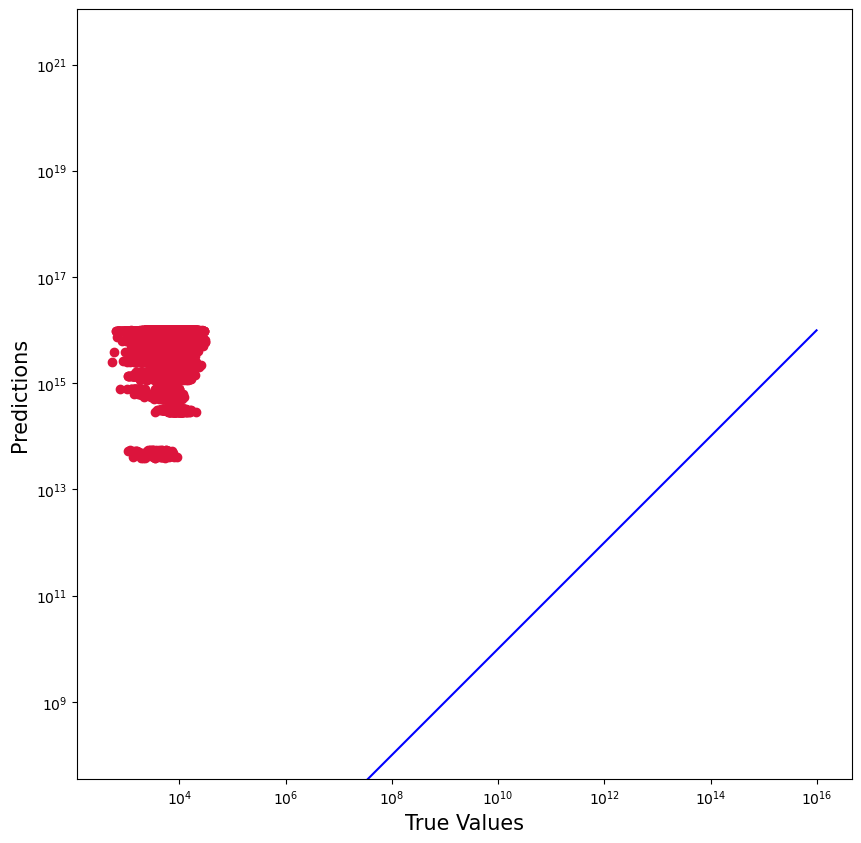

In [148]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

###  Random Forest Regressor

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
rfgm = RandomForestRegressor()
rfgm.fit(x_train, y_train)

prediction_open = rfgm.predict(x_test)
prediction_closed = np.zeros(combined_df_subset_closed.shape[0])

prediction = np.append(prediction_open, prediction_closed)

print("R2_score: ", r2_score(y_test, prediction))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, prediction))
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test, prediction)))

R2_score:  0.9655375856534463
Mean absolute error: 357.51
Root mean squared error:  761.3281375789611


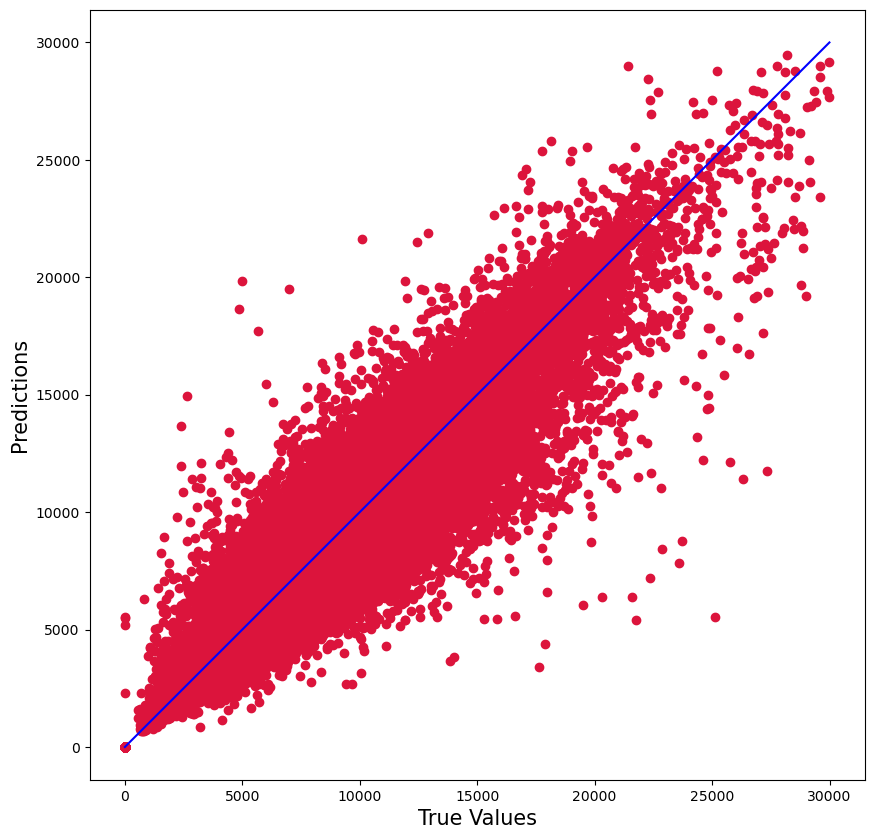

In [151]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

###  Decision Tree Regressor

In [152]:
from sklearn.tree import DecisionTreeRegressor

In [153]:
dtrm = DecisionTreeRegressor()
dtrm.fit(x_train, y_train)

prediction_open = dtrm.predict(x_test)
prediction_closed = np.zeros(combined_df_subset_closed.shape[0])

prediction = np.append(prediction_open, prediction_closed)

y_test = np.append(y_test_open, np.zeros(combined_df_subset_closed.shape[0]))

print("R2 score: ", r2_score(y_test, prediction))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, prediction))
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test, prediction)))


R2 score:  0.9517827504655759
Mean absolute error: 421.67
Root mean squared error:  900.53427642943


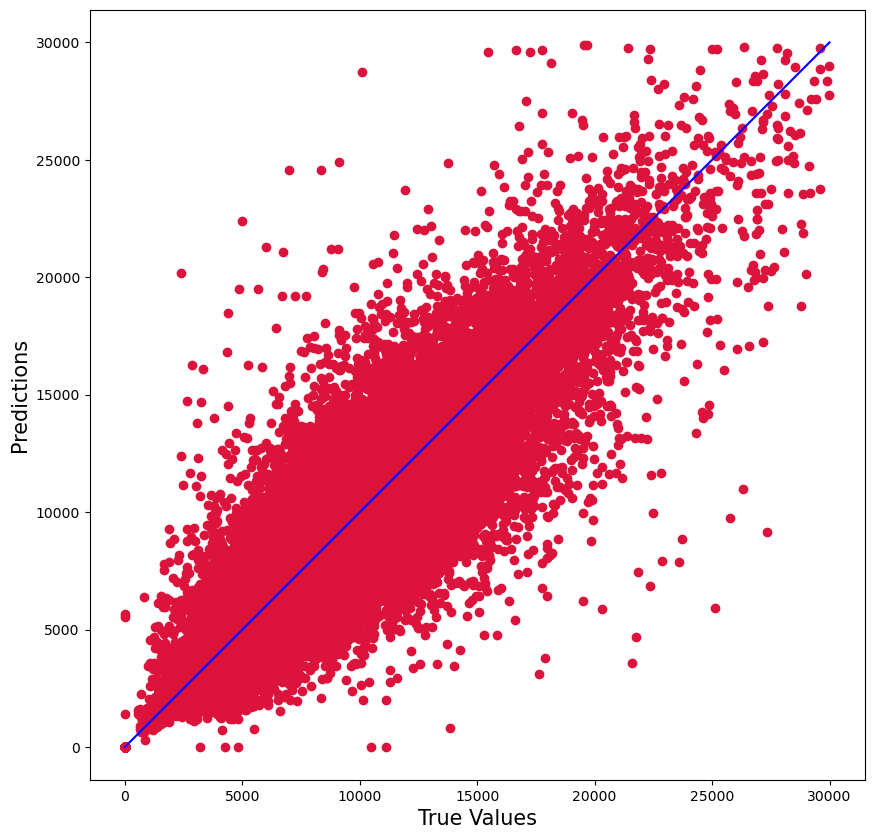

In [154]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))

plt.plot([p1,p2], [p1,p2], 'b-')
plt.xlabel("True Values", fontsize=15)
plt.ylabel("Predictions", fontsize=15)
plt.axis('equal')
plt.show()


Random Forest Regressor had the lowest error as compared to other stores that means it is better at predicting sales than other models so we have selected that as our model

## 7. Feature Importance Analysis

In [155]:
feature_importance = rfgm.feature_importances_
feature_importance

array([0.18148308, 0.08272348, 0.14022757, 0.00123062, 0.01266539,
       0.03500817, 0.03149428, 0.20824226, 0.06880786, 0.07341331,
       0.00294603, 0.02971715, 0.03226067, 0.01302413, 0.02385973,
       0.06289626])

In [156]:
cols = list(x_train.columns)
cols

['Store',
 'DayOfWeek',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'Year',
 'Month']

In [157]:
feature_importance_value = []
for i in range(len(feature_importance)):
    feature_importance_value.append(round(feature_importance[i], 5))
feature_importance_value

[0.18148,
 0.08272,
 0.14023,
 0.00123,
 0.01267,
 0.03501,
 0.03149,
 0.20824,
 0.06881,
 0.07341,
 0.00295,
 0.02972,
 0.03226,
 0.01302,
 0.02386,
 0.0629]

In [158]:
# making a dataframe
feature_importance_df = pd.DataFrame({"Features":cols,
                                     "Values": feature_importance_value})
feature_importance_df

,Features,Values
0,Store,0.18148
1,DayOfWeek,0.08272
2,Promo,0.14023
3,StateHoliday,0.00123
4,SchoolHoliday,0.01267
5,StoreType,0.03501
6,Assortment,0.03149
7,CompetitionDistance,0.20824
8,CompetitionOpenSinceMonth,0.06881
9,CompetitionOpenSinceYear,0.07341


In [159]:
feature_importance_df.sort_values(by=['Values'], inplace=True, ascending=False)
feature_importance_df

,Features,Values
7,CompetitionDistance,0.20824
0,Store,0.18148
2,Promo,0.14023
1,DayOfWeek,0.08272
9,CompetitionOpenSinceYear,0.07341
8,CompetitionOpenSinceMonth,0.06881
15,Month,0.06290
5,StoreType,0.03501
12,Promo2SinceYear,0.03226
6,Assortment,0.03149


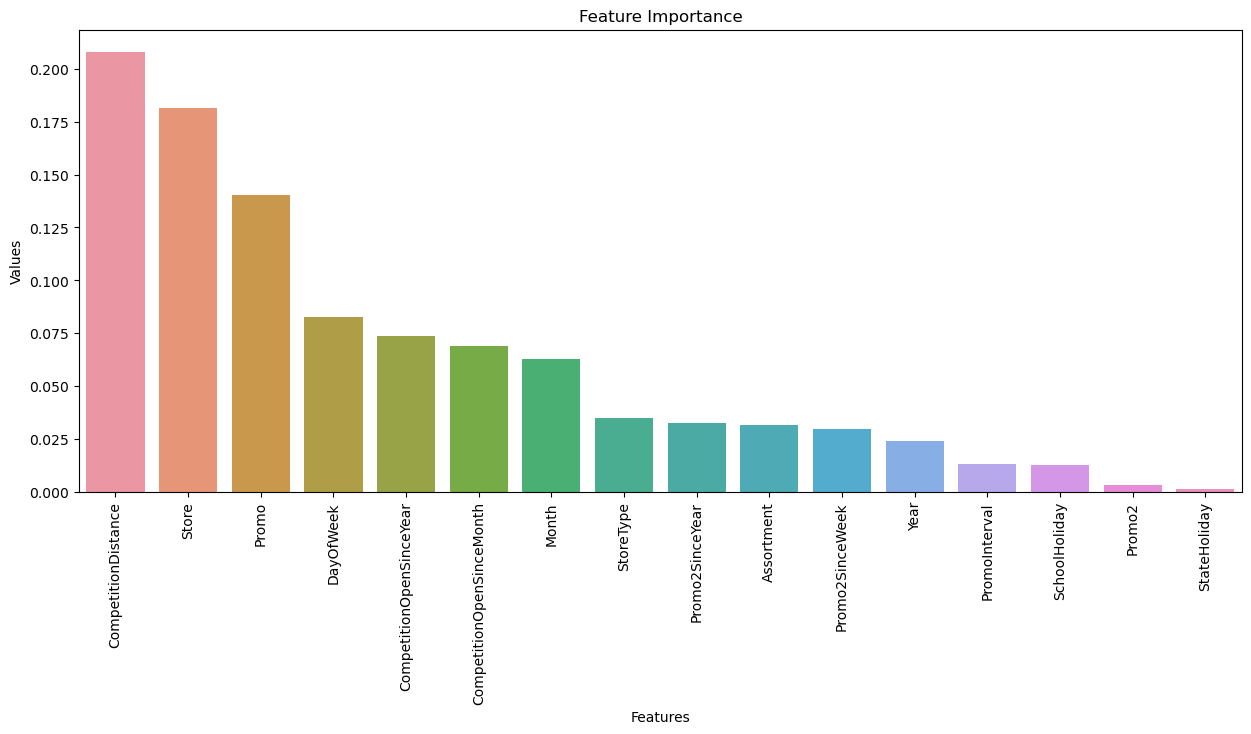

In [160]:
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
           data=feature_importance_df).set(title="Feature Importance")
plt.xticks(rotation=90)
plt.show()